In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.load('results/data_lr2.npz')
return_array = data['evaluate_return_array']
bw_utilization = data['bw_utilization_array']
actor_loss = data['actor_loss_array']
critic_loss = data['critic_loss_array']
random = np.load('results/random_results.npz')
random_return = random['random_score_array']
random_utilization = random['random_utilization_array']

In [5]:
print(actor_loss.shape, critic_loss.shape, bw_utilization.shape, return_array.shape, random_return.shape, random_utilization.shape)

(12181,) (12181,) (195,) (195,) (195,) (195,)


损失函数绘制

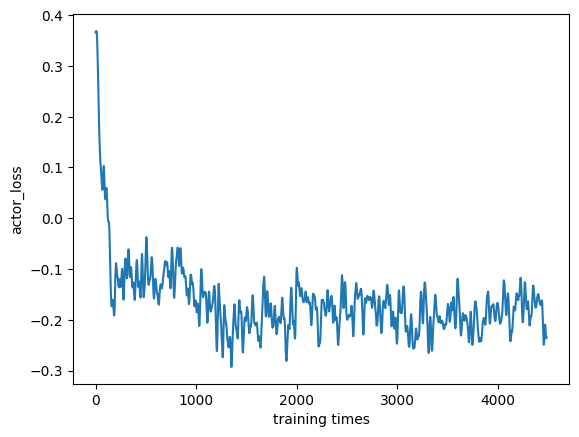

In [10]:
alpha = 0.06
actor_loss = actor_loss[:4500]
ewma_actor = [actor_loss[0]]
for i in range(1, len(actor_loss)):
    ewma_actor.append(alpha * actor_loss[i] + (1 - alpha) * ewma_actor[-1])
ewma_actor = np.convolve(ewma_actor, np.ones(15)/15, mode='valid')
plt.plot(ewma_actor)
plt.xlabel('training times')
plt.ylabel('actor_loss')
plt.show()

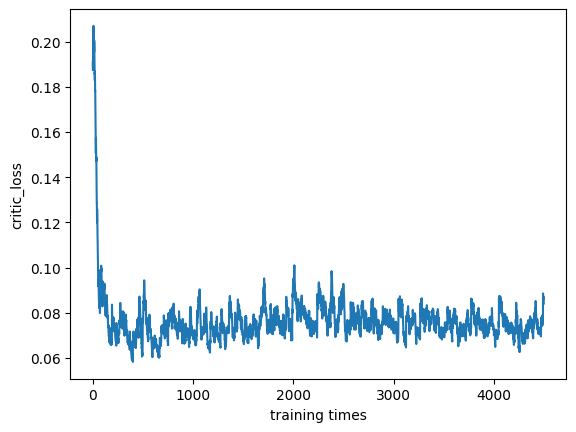

In [11]:
alpha = 0.06
critic_loss = critic_loss[:4500]
ewma_critic = [critic_loss[0]]
for i in range(1, len(critic_loss)):
    ewma_critic.append(alpha * critic_loss[i] + (1 - alpha) * ewma_critic[-1])
# ewma_critic = np.convolve(ewma_critic, np.ones(15)/15, mode='valid')
plt.plot(ewma_critic)
plt.xlabel('training times')
plt.ylabel('critic_loss')
plt.show()

认知路由方法

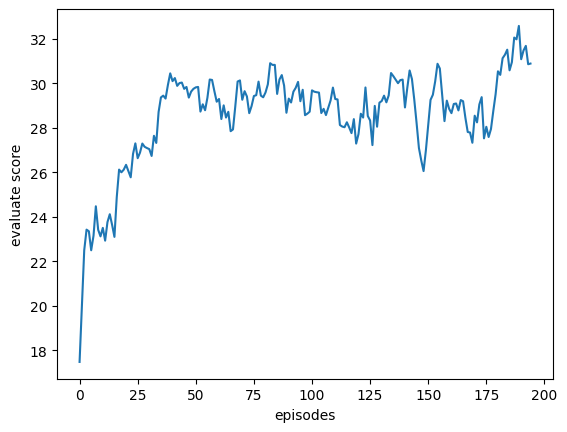

In [21]:
alpha = 0.3
ewma = [return_array[0]]
for i in range(1, len(return_array)):
    ewma.append(alpha * return_array[i] + (1 - alpha) * ewma[-1])
# returns = np.convolve(return_array, np.ones(5)/5, mode='valid')
plt.plot(ewma)
plt.xlabel('episodes')
plt.ylabel('evaluate score')
plt.show()

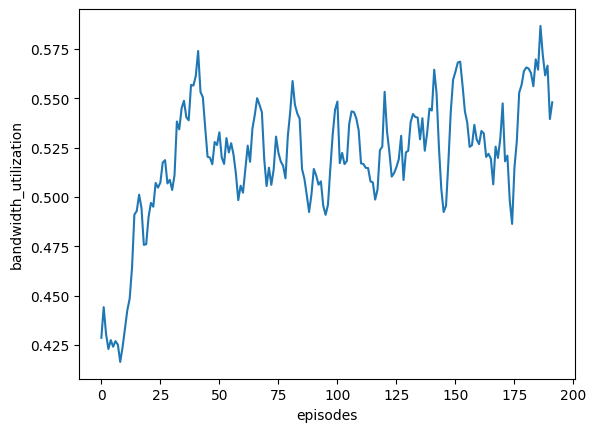

In [22]:
utilization = np.convolve(bw_utilization, np.ones(4)/4, mode='valid')

plt.plot(utilization)
plt.xlabel('episodes')
plt.ylabel('bandwidth_utilization')
plt.show()

随机化方式

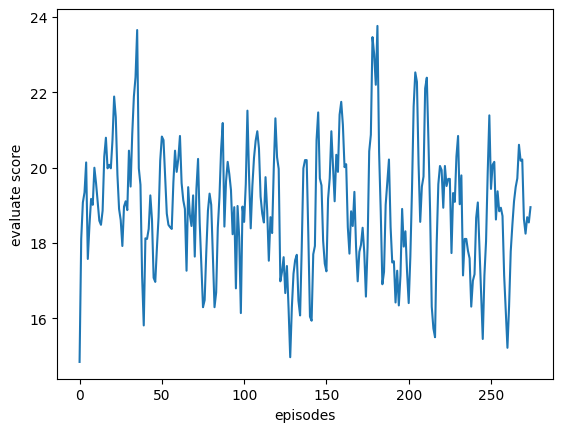

In [29]:
# alpha = 0.06
# ewma = [critic_loss[0]]
# for i in range(1, len(critic_loss)):
#     ewma.append(alpha * critic_loss[i] + (1 - alpha) * ewma[-1])
returns = np.convolve(random_return, np.ones(4)/4, mode='valid')
plt.plot(returns)
plt.xlabel('episodes')
plt.ylabel('evaluate score')
plt.show()

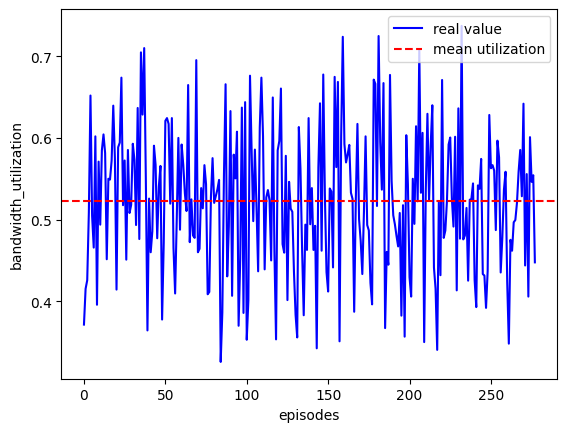

In [37]:
plt.plot(random_utilization,label='real value', color='blue')
mean_utilization = np.mean(random_utilization)
# print(mean_utilization)
# mean_array = np.array([mean_utilization] * len(random_utilization))
# plt.plot(mean_utilization, label='avg', color='red')
plt.axhline(y=mean_utilization, color='red', linestyle='--', label='mean utilization')
plt.xlabel('episodes')
plt.ylabel('bandwidth_utilization')
plt.legend()
plt.show()

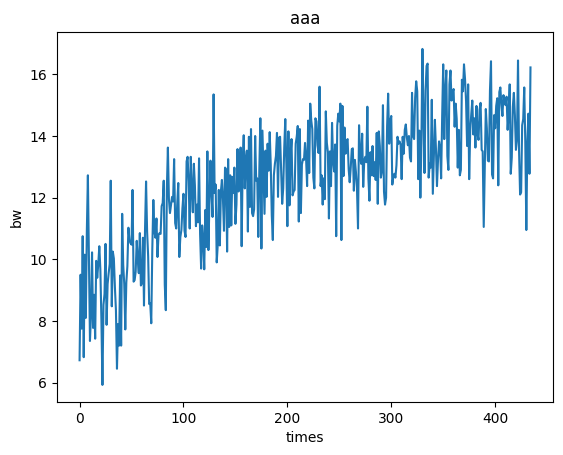

In [17]:
plt.plot(return_array)
plt.xlabel('times')
plt.ylabel('bw')
plt.title('aaa')
plt.show()

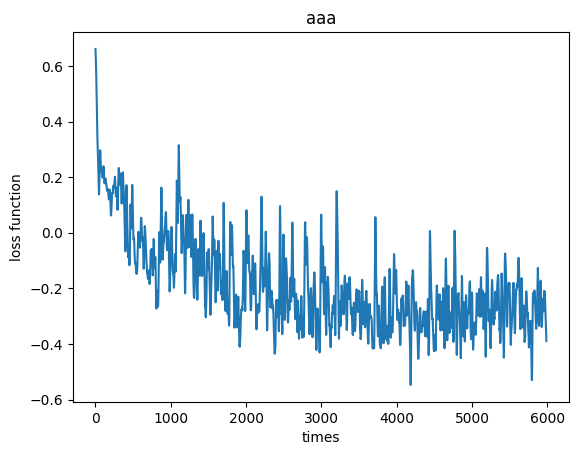

In [19]:
smoothed_loss = np.convolve(actor_loss[:3000], np.ones(15)/15, mode='valid')
alpha = 0.1
ewma = [actor_loss[0]]
for i in range(1, len(actor_loss[:6000])):
    ewma.append(alpha * actor_loss[i] + (1 - alpha) * ewma[-1])
ewma = np.convolve(ewma, np.ones(15)/15, mode='valid')
plt.plot(ewma)
plt.xlabel('times')
plt.ylabel('loss function')
plt.title('aaa')
plt.show()

In [ ]:
# lOSS曲线图
actor_loss_mean = np.mean(actor_loss)
actor_loss_std = np.std(actor_loss)
actor_loss_max = actor_loss_mean + actor_loss_std * 0.95
actor_loss_min = actor_loss_mean - actor_loss_std * 0.95